# M 368 Final Project - Breast Cancer Classification
## Youmeng Hin & Rahul Kumar
## 5/8/2022
### Import libraries and data preparation

In [1]:
# set seed for consistent results
set.seed(1)

In [2]:
# load data from csv file
bc <- read.csv("breast-cancer.csv")

# check if dataset is a dataframe
is.data.frame(bc)

[1] TRUE

In [3]:
# check dimension of dataset
dim(bc)
head(bc)

[1] 569  32

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [4]:
# list column names
colnames(bc)

[1] "id"                      "diagnosis"              
 [3] "radius_mean"             "texture_mean"           
 [5] "perimeter_mean"          "area_mean"              
 [7] "smoothness_mean"         "compactness_mean"       
 [9] "concavity_mean"          "concave.points_mean"    
[11] "symmetry_mean"           "fractal_dimension_mean" 
[13] "radius_se"               "texture_se"             
[15] "perimeter_se"            "area_se"                
[17] "smoothness_se"           "compactness_se"         
[19] "concavity_se"            "concave.points_se"      
[21] "symmetry_se"             "fractal_dimension_se"   
[23] "radius_worst"            "texture_worst"          
[25] "perimeter_worst"         "area_worst"             
[27] "smoothness_worst"        "compactness_worst"      
[29] "concavity_worst"         "concave.points_worst"   
[31] "symmetry_worst"          "fractal_dimension_worst"

In [5]:
# count amount of null values in datafram
sum(is.na(bc) == TRUE) 

[1] 0

In [6]:
# check columns with 0 values
colSums(bc == 0)

id               diagnosis             radius_mean 
                      0                       0                       0 
           texture_mean          perimeter_mean               area_mean 
                      0                       0                       0 
        smoothness_mean        compactness_mean          concavity_mean 
                      0                       0                      13 
    concave.points_mean           symmetry_mean  fractal_dimension_mean 
                     13                       0                       0 
              radius_se              texture_se            perimeter_se 
                      0                       0                       0 
                area_se           smoothness_se          compactness_se 
                      0                       0                       0 
           concavity_se       concave.points_se             symmetry_se 
                     13                      13                       0 
   fractal_dimension_se            radius_worst           texture_worst 
                      0                       0                       0 
        perimeter_worst              area_worst        smoothness_worst 
                      0                       0                       0 
      compactness_worst         concavity_worst    concave.points_worst 
                      0                      13                      13 
         symmetry_worst fractal_dimension_worst 
                      0                       0

In [7]:
# remove ID column
bc <- bc[,-1]

In [8]:
# check values to predict
unique(bc$diagnosis)

[1] "M" "B"

In [9]:
# convert predicted values to numeric (1 = M, 0 = B)
bc$diagnosis <-ifelse(bc$diagnosis=="M",1,0)

In [10]:
# view new updated data
head(bc)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [11]:
# check values to predict
unique(bc$diagnosis)

[1] 1 0

In [12]:
# split to train and test
split1 <- sample(c(rep(0, 0.8 * nrow(bc)), rep(1, 0.2 * nrow(bc)))) #80% train, 20% test
# create training and test sets
train <- bc[split1 == 0,]
test <- bc[split1 == 1,]
# check dimensions for both
dim(train)
dim(test)

[1] 456  31

[1] 113  31

In [13]:
# view training and test sets
head(train)
head(test)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
4,1,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,1,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,1,12.45,15.70,82.57,477.1,0.12780,0.1700,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
7,1,18.25,19.98,119.60,1040.0,0.09463,0.1090,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
8,1,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
9,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.2,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
13,1,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,20.96,29.94,151.7,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.10230
16,1,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,...,17.46,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410
20,0,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,...,15.11,19.26,99.7,711.2,0.1440,0.1773,0.2390,0.1288,0.2977,0.07259


### Using keras/tensorflow for classifcation with neural networks

In [14]:
# import libraries
library('keras')
library('tensorflow')

### Some more data preprocessing...

In [15]:
# scale/normalize training and test sets
m <- colMeans(train[,-1])
s <- apply(train[,-1], 2, sd)
train[,-1] <- scale(train[,-1], center = m, scale = s)
test[,-1] <- scale(test[,-1], center = m, scale = s)

In [16]:
# check number of columns
ncol(train)

# split predictors and response variables for training set
#train_x <- train[,2:31]
train_x <- model.matrix(diagnosis~.,data=train) #transform variables into numeric...
train_y <- train[,1]

# split predictors and response variables for test set
test_x <- model.matrix(diagnosis~.,data=test)
test_y <- test[,1]

# view datasets post preproceessing
head(train_x)
train_y
head(test_x)
test_y

[1] 31

,(Intercept),radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
1,1,1.1257202,-2.0370659,1.30571813,1.0246620,1.5404104,3.27203708,2.68760433,2.5583104,2.16707651,...,1.9600395,-1.3185245,2.3969994,2.12325555,1.3211585,2.5869604,2.10657008,2.3216497,2.6493710,1.86540513
4,1,-0.7699893,0.2892545,-0.59105574,-0.7690168,3.2083655,3.39065423,1.94557477,1.4726124,2.80421693,...,-0.2722042,0.1666723,-0.2400377,-0.55307207,3.3875712,3.8480941,1.98751123,2.2009043,5.8356551,4.76263199
5,1,1.7893629,-1.1158431,1.82164734,1.8881015,0.2877138,0.54572557,1.39695325,1.4492919,-0.01638222,...,1.3545407,-1.4254198,1.4003821,1.30447965,0.2445402,-0.3073005,0.62119187,0.7489018,-0.8497540,-0.39025468
6,1,-0.4727928,-0.7994635,-0.38174787,-0.5035675,2.1909821,1.24613157,0.88878309,0.8427003,0.97870225,...,-0.1528101,-0.2787248,-0.1006958,-0.23238484,2.0548218,1.7028473,1.26649084,0.9261990,1.6858212,2.15994760
7,1,1.2007407,0.1962017,1.17149265,1.1384260,-0.1047056,0.09761636,0.31867178,0.6641691,-0.07007383,...,1.4270300,0.3545489,1.4311419,1.36164644,0.5397420,0.0232208,0.51832502,1.2181279,0.2436248,-0.02073776
8,1,-0.1092321,0.3939389,-0.06170398,-0.2095313,1.5750152,1.14257692,0.07798621,0.2975193,1.36886127,...,0.1861839,0.4322909,0.1207747,0.05418672,1.4600770,0.7181953,-0.00839133,0.6434406,0.4516640,1.66190305


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0
 [38] 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0
 [75] 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0
[112] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1
[149] 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0
[186] 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0
[223] 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
[260] 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1
[297] 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
[334] 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
[371] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0
[408] 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 1 1 1 1 0

,(Intercept),radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
2,1,1.8701541,-0.3179152,1.7293673,1.97269520,-0.78919006,-0.4740053,-0.007467275,0.56492747,-0.005643899,...,1.8768900,-0.333792077,1.6033967,2.0070779,-0.3458635,-0.4229202,-0.1331650,1.1080814,-0.2459711,0.2652362
3,1,1.6162387,0.4916444,1.6077255,1.61390110,0.93136451,1.0559676,1.389368620,2.06080679,0.914272320,...,1.5741406,0.009568578,1.4096100,1.5515877,0.5484244,1.0719662,0.8612145,1.9792828,1.1039372,0.1881196
9,1,-0.3140957,0.6242446,-0.1749567,-0.37901049,2.15637721,1.6829439,1.243996558,1.17022352,1.920095112,...,-0.1485460,0.851773958,-0.0145684,-0.2366263,1.6727960,1.7983591,1.2831591,1.4137661,2.3005535,1.2388330
13,1,1.4661978,1.3174881,1.7083946,1.38053909,0.08700547,2.6733029,1.504402164,1.64362929,2.088328817,...,1.0176787,0.723823525,1.3850022,0.8563658,-1.2184453,0.8570645,0.4492709,0.9659380,0.4203799,0.9764224
16,1,0.1302563,1.9548999,0.2121999,0.02645601,1.22896646,1.0484363,0.965893484,0.65484088,1.751861407,...,0.2714655,1.888334426,0.5360319,0.1393837,1.5642659,2.5373194,2.0622802,0.8818747,2.0502808,2.6794134
20,1,-0.1582840,-1.1111904,-0.1766346,-0.24336882,0.11399727,-0.4241108,-0.263574925,-0.01445694,0.255655261,...,-0.2295634,-1.005936755,-0.2145071,-0.2884452,0.5310596,-0.4813583,-0.1455471,0.2338230,0.1091032,-0.6146425


[1] 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1
 [38] 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 [75] 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0
[112] 1 1

### Neural network model #1

In [17]:
# create model 1
modnn_1 <- keras_model_sequential() %>%
    layer_dense(units = 5, activation = 'sigmoid', input_shape = ncol(train)) %>%
    layer_dense(units = 1, activation = 'sigmoid')

Loaded Tensorflow version 2.8.0



In [18]:
# compile model 1
modnn_1 %>% compile(loss="mse", optimizer=optimizer_rmsprop(), metrics = list("mean_absolute_error"))

# check it to make sure it is valid...
summary(modnn_1)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1 (Dense)                    (None, 5)                       160         
 dense (Dense)                      (None, 1)                       6           
Total params: 166
Trainable params: 166
Non-trainable params: 0
________________________________________________________________________________


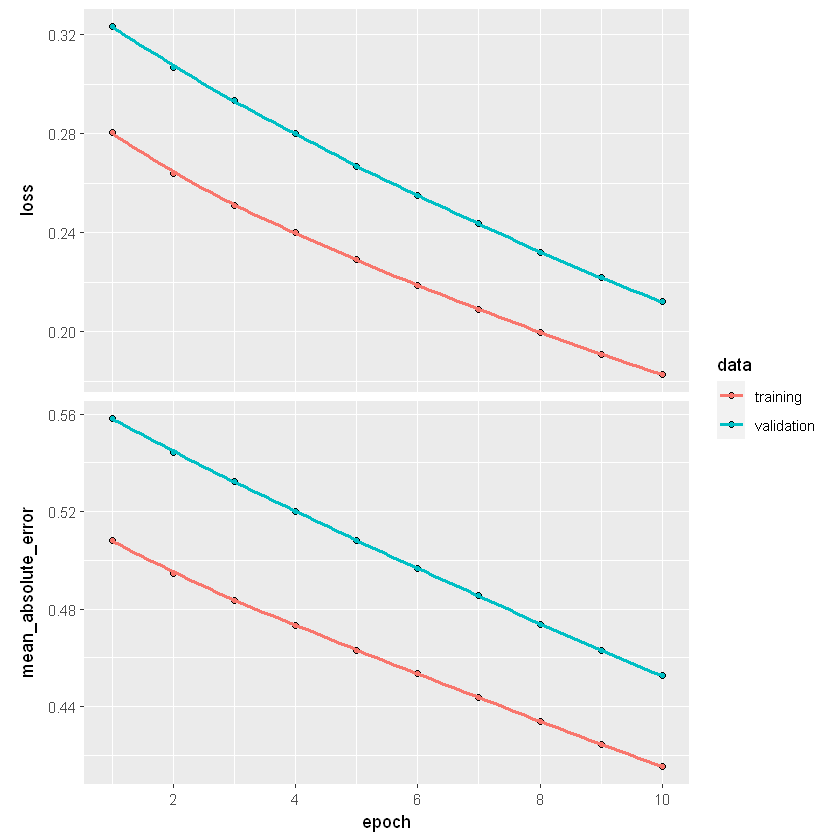

In [19]:
# fit model 1
history <- modnn_1 %>% fit(train_x, train_y, epochs=10, batch_size=32, validation_split = 0.2)

# plot performance
plot(history)


In [20]:
# check performance
modnn_1 %>% evaluate(test_x, test_y, verbose = 0)

loss mean_absolute_error 
          0.1832700           0.4163179

In [21]:
# helper function to calcultae how good we are doing...
get_class<-function(P){
    C <- vector(mode='numeric',length=dim(P)[1]);
    b <- 1/dim(P)[1]; #cuttoff point for class models
    for(i in 1:dim(P)[1]){  #for each row
        C[i] <- which.max(P[i,])-1; #take the maximum estimate of the classes
    }
    C
}

# helper function for checking accuracy
get_accuracy<-function(T,P){
    S <- vector(mode='numeric',length=length(T));
    for(i in 1:length(T)){
        if(T[i]==1 && P[i]==1){ S[i] <- 1; }
    }
    n <- sum(S)/sum(T); #proportion of true correct
    m <- sum(S)/sum(P); #proportion of guesses correct
    2*(n*m)/(n+m)       #harmonic mean (F1 accuracy measure)
}


In [22]:
# predicted values
P <- round(predict(modnn_1,test_x))

# check accuracy
get_accuracy(test_y,P)

[1] 0.7924528

Above is our first neural network model consisting of two layers using sigmoid an activation function. The first layer is constructed with 5 neuron units and the second is constructed with 1 neuron unit as an output. 80% of the dataset is allocated for the training set and 20% is allocated for the test set. We then sliced between the predictor columns and the response column for our training and test sets. Following that, the training set is used to fit our model and model is then tested against the unseen test data. When fitting our model with the train data, we set the epochs to 10, use the default batch size of 32, and used 20% of our training data for validation. The results showed that our model scores around 0.1 for the loss function and around 0.3 for the mean absolute error, which isn't too terrible. It means that on average our predictions are only off by 0.3 when fitting.

In order to check the accuracy of our model, we need to round our predicted values; reason being that the sigmoid activation function outputs values between 0 and 1, so rounding the predicted values would allow us to compare them against the true values. We also use a helper function to get the F1 accuracy score which takes into consideration the distributions of 1's and 0's. The result shows that our accuracy ranges widley which deems this model to be unreliable, but having more data or adjusting the parameters can help yield better performance.

### Neural network model #2

In [23]:
# create model 2
modnn_2 <- keras_model_sequential() %>%
    layer_dense(units = 20, activation = 'sigmoid', input_shape = ncol(train)) %>%
    layer_dense(units = 20, activation = 'relu') %>%
    layer_dense(units = 20, activation = 'tanh') %>%
    layer_dense(units = 1, activation = 'sigmoid')

In [24]:
# compile model 2
modnn_2 %>% compile(loss="mse", optimizer=optimizer_rmsprop(), metrics = list("mean_absolute_error"))

# check it to make sure it is valid...
summary(modnn_2)

Model: "sequential_1"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_5 (Dense)                    (None, 20)                      640         
 dense_4 (Dense)                    (None, 20)                      420         
 dense_3 (Dense)                    (None, 20)                      420         
 dense_2 (Dense)                    (None, 1)                       21          
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
________________________________________________________________________________


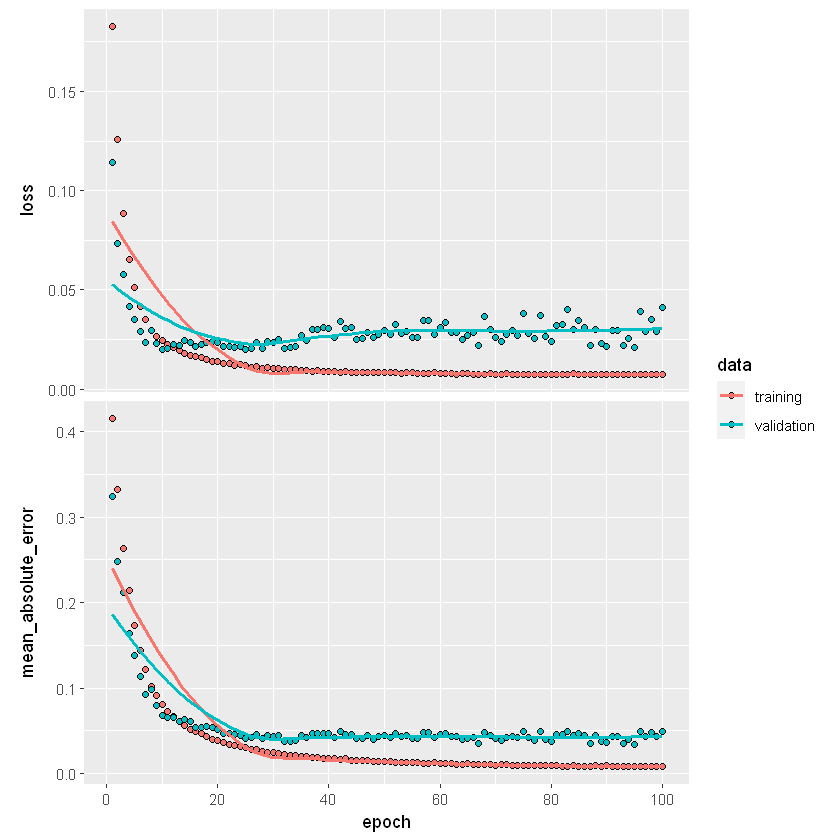

In [25]:
# fit model 2
history <- modnn_2 %>% fit(train_x, train_y, epochs=100, batch_size=32, validation_split = 0.1)

# plot performance
plot(history)

In [26]:
# check performance
modnn_2 %>% evaluate(test_x, test_y, verbose = 0)

loss mean_absolute_error 
         0.01770258          0.01799367

In [27]:
# predicted values
P <- round(predict(modnn_2,test_x))

# check accuracy
get_accuracy(test_y,P)

[1] 0.9761905

For this second model, we're looking to improve the performance by making adjustments to the parameters such as the number of layers, the number of neuron units used for each layer, different activation functions, validation split, and epoch size when fitting. We added 2 more layers to this model and increased the number of neuron units to 20 for each layer besides the output layer. The 2 layers added use retified linear unit and hyperbolic tangent activation functions. When fitting this model against the training set, we increased the epochs to 100 and reduce the validation split to 10% of the training set.

Based on the results shown above, this new model returned more consistent loss function and mean abosolute error scores. The loss function score we got is around 0.02 and the mean absolute error score is around 0.03. This means that on average our model's predictions are only off by 0.03. This is 10 times lower than mean absolute error score for the previous model. We also got a much more consistent and higher F1 accuracy score. Our new model returned a consistent 96% accuracy outperforming our first model. By adjusting the parameters and epoch size, we were able to get better and more consistent performance out of neural network classifcation.